## Load Datasets
Labels

0: 1 Cent

1: 10 Cent 

2: 2 Euro


In [1]:
import glob
from scipy.io import wavfile
import numpy as np

data1Cent = [wavfile.read(infile)[1] for infile in glob.glob('coins_audio_data/1_cent/*.wav')]
data10Cent = [wavfile.read(infile)[1] for infile in glob.glob('coins_audio_data/10_cent/*.wav')]
data2Euro = [wavfile.read(infile)[1] for infile in glob.glob('coins_audio_data/2_euro/*.wav')]

# Combine into one sample set
data = np.array(data1Cent + data10Cent + data2Euro)
data = data.T
data = np.float32(data)
# Labels:
labels = np.zeros(150)
labels[50:100] += 1
labels[100:150] += 2

## Part 2: Signal conditioning
1. Normalisation
1. Find ROI
1. Filtering?

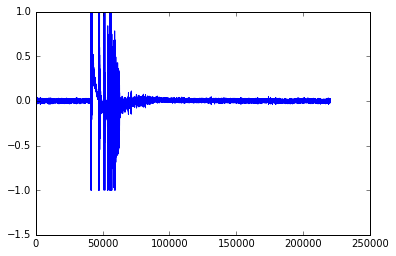

In [3]:
import matplotlib.pyplot as plt

# Normalise data
data = data / data.max(axis=0)

plt.plot(data[:,23])
plt.show()

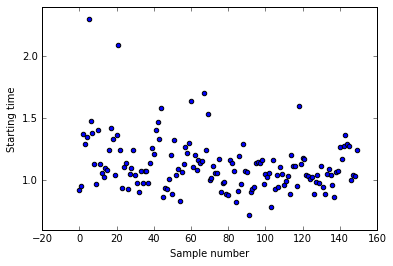

In [4]:
# Find the region of interest
# Use thresholding to remove the recorded data before the coin hits
mark = np.zeros(data.shape[1], dtype=int)

for i in range(data.shape[1]): 
    for j in range(data.shape[0]):
        if(data[j, i] > 0.7):
            mark[i] = j
            break
plt.figure(2)
plt.clf()
plt.scatter(range(len(mark)), (mark/(44100.0)))
plt.xlabel('Sample number')
plt.ylabel('Starting time')
plt.show()

(88200, 150)


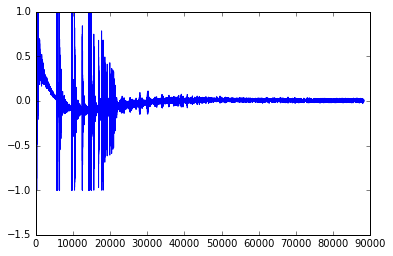

In [9]:
# remove data before mark and data two seconds after mark
data_roi = np.zeros((44100*2, data.shape[1]))
print data_roi.shape
for i, m in enumerate(mark):
    data_roi[:, i] = data[m-100:m+2*44100-100, i]

plt.plot(data_roi[:,23])
plt.show()

In [ ]:
# Filter data



## Part 3: Feature computation
1. FFT
1. Spectrum (time vs freq)

## Part 4: Feature extraction

## Part 5: Training classifier

## Part 6: Testing classifier